# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
candy_data= pd.read_excel('candyhierarchy2017.xlsx')
candy_data

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [2]:
candy_data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Internal ID                                                                            2460 non-null   int64  
 1   Q1: GOING OUT?                                                                         2350 non-null   object 
 2   Q2: GENDER                                                                             2419 non-null   object 
 3   Q3: AGE                                                                                2376 non-null   object 
 4   Q4: COUNTRY                                                                            2396 non-null   object 
 5   Q5: STATE, PROVINCE, COUNTY, ETC                                           

In [3]:
candy_data.sample(10)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
2346,90294949,Yes,Female,24,Canada,BC,MEH,DESPAIR,JOY,DESPAIR,...,Non-perishable food items,"I had to Ecosia search (""Google"") so many of t...",Blue and black,NaN,Friday,NaN,NaN,NaN,1.0,"(87, 88)"
2312,90292940,No,Male,73,USA,Pa. Northampton county,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,90274394,No,Female,33,USA,MA,MEH,DESPAIR,MEH,DESPAIR,...,NaN,Candy corn and Peeps are the worst candies ever,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(84, 29)"
704,90275671,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,90291912,No,I'd rather not say,35,USA,IL,NaN,NaN,NaN,NaN,...,NaN,The moment I realized you expected me to evalu...,White and gold,NaN,NaN,NaN,1.0,NaN,NaN,"(77, 23)"
2411,90305594,No,Male,33,usa,nj,MEH,DESPAIR,JOY,MEH,...,NaN,NaN,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(70, 17)"
2212,90288589,Yes,Other,1,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1337,90278731,NaN,Male,45,United States,FL,MEH,DESPAIR,MEH,MEH,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(71, 44)"
2251,90289758,No,Female,52,usa,ca,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1394,90278992,No,Male,35,USA,Wyoming,JOY,JOY,JOY,DESPAIR,...,Plastic rings with large plastic spiders.,"I realized while taking this quiz that, as far...",White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(76, 32)"


C:\Users\hpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hpc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


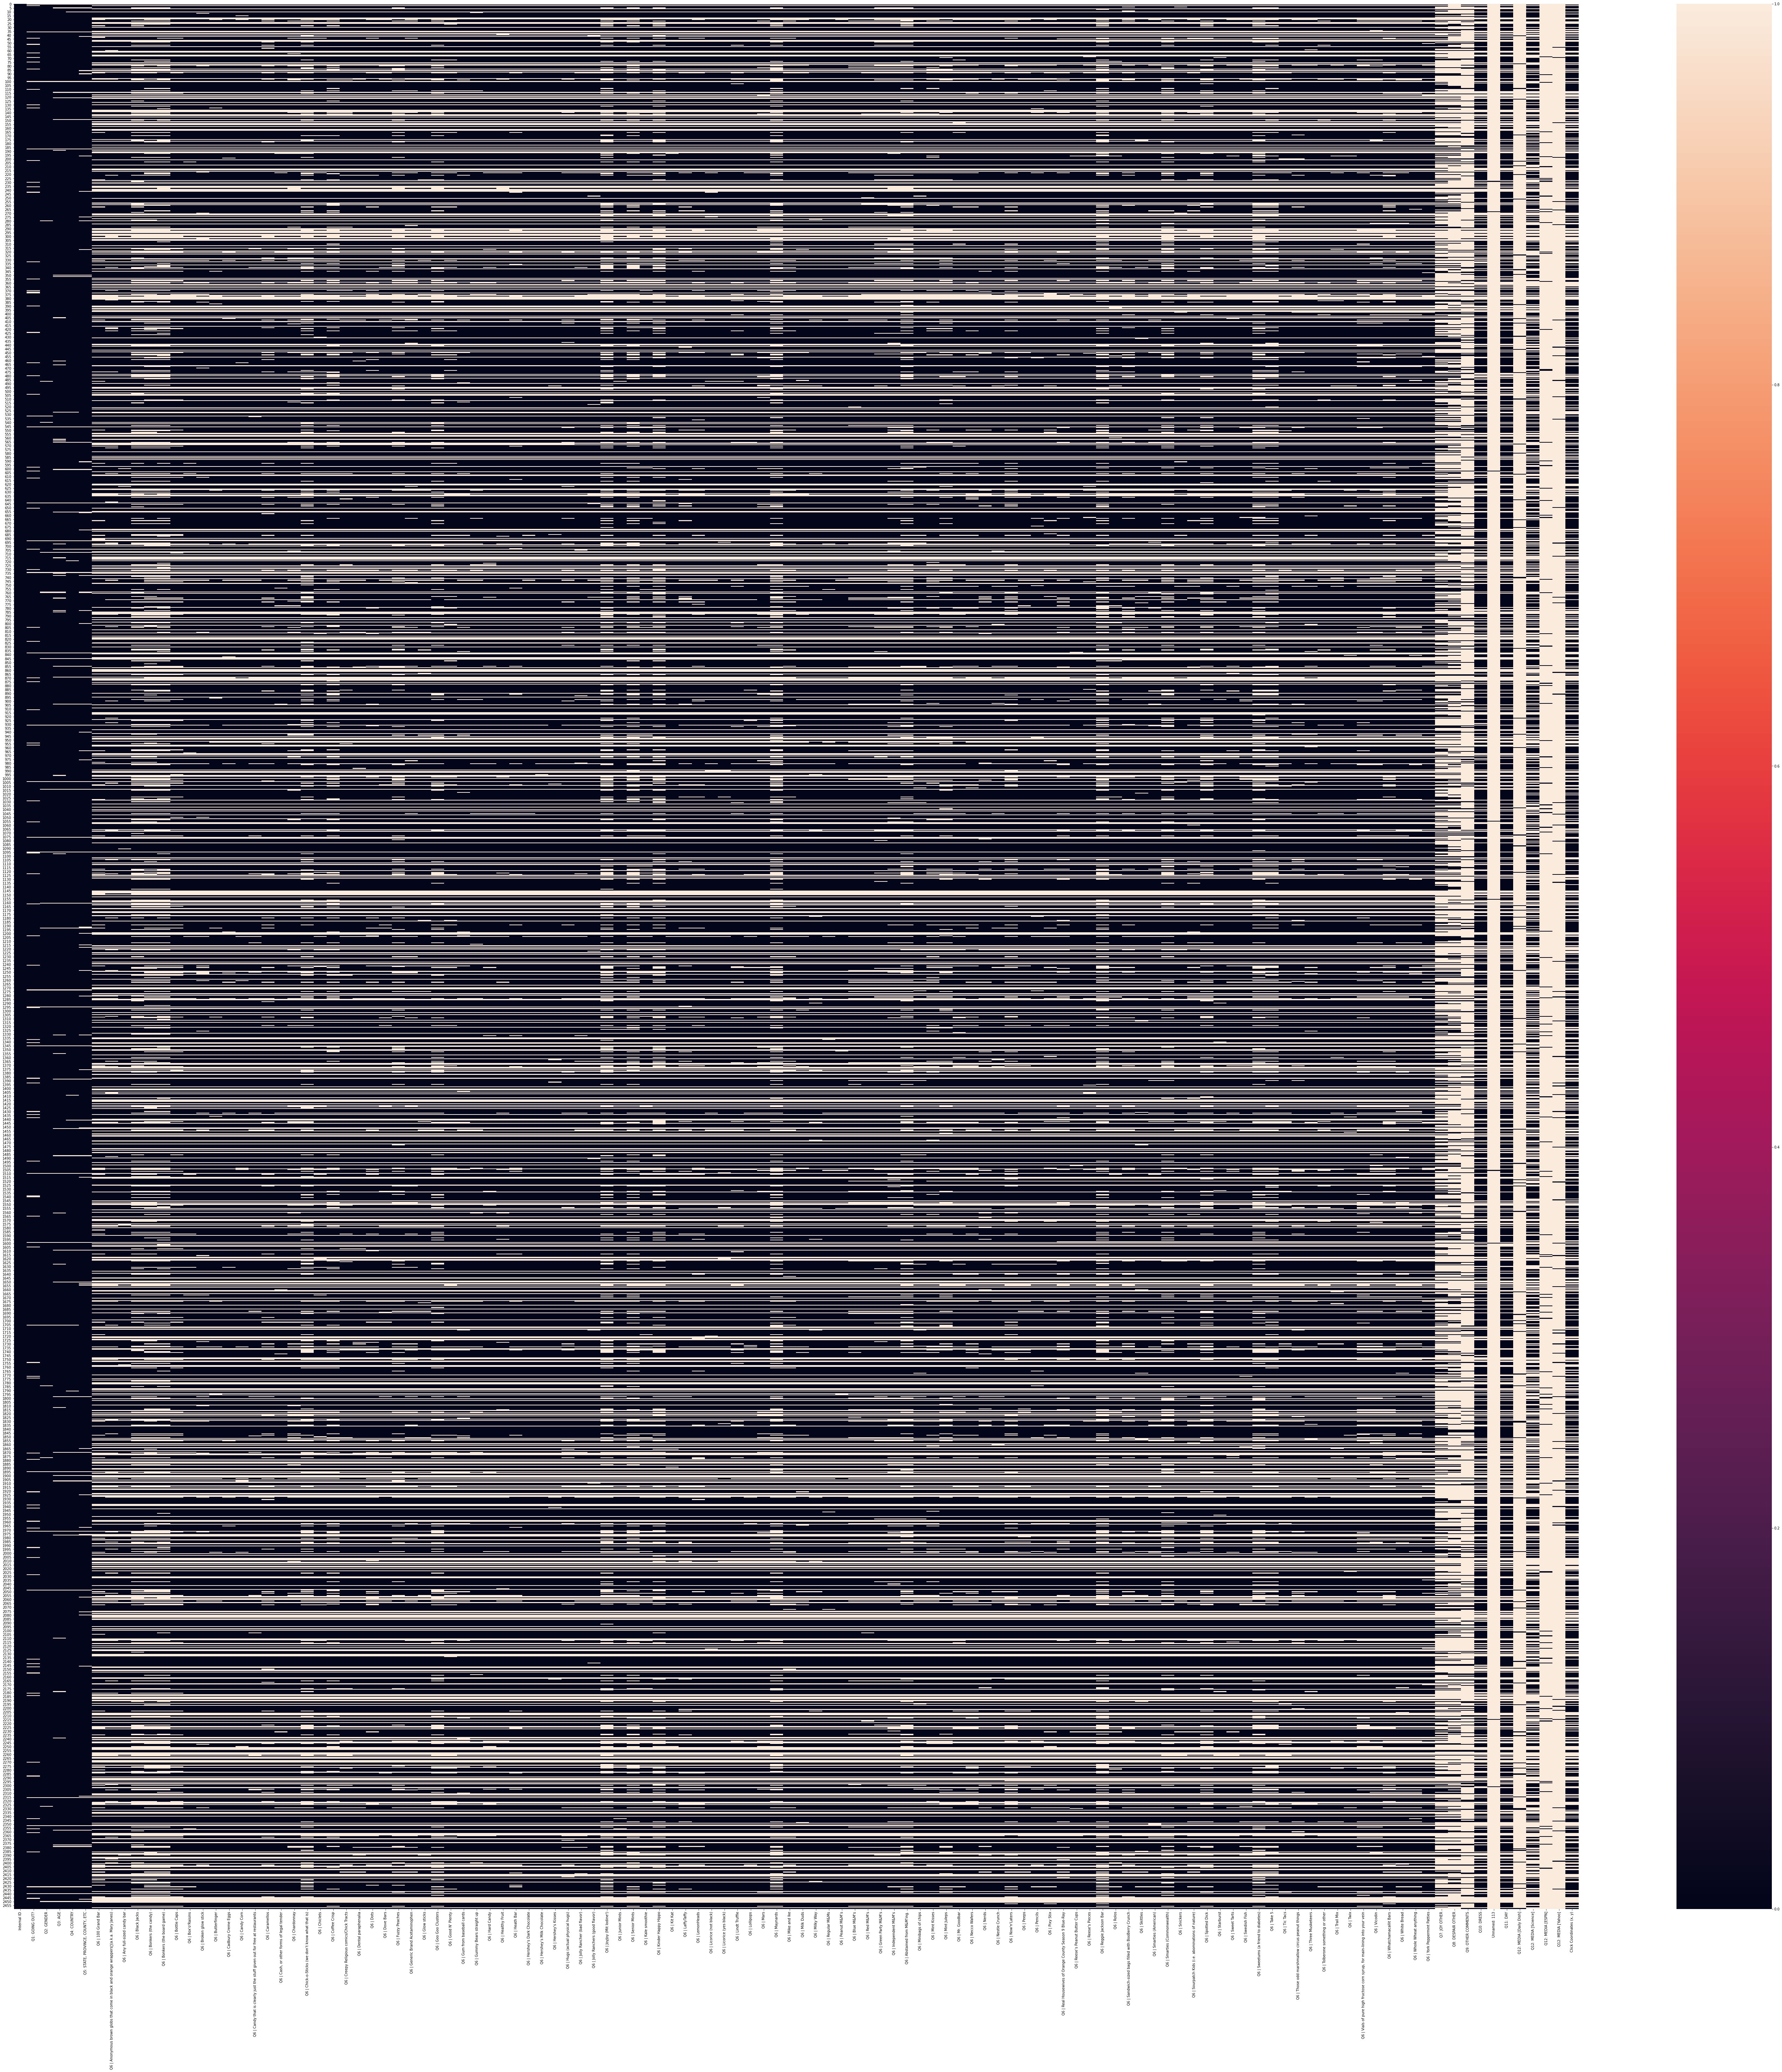

In [4]:
plt.figure(figsize=(100,100))
sns.heatmap(candy_data.isna())

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , we have a wrong data type for example Q1 and Q2 should be a categorical type also we have many nan values for some columns so this column we will try to understand what they do because they are about 2000 nan for some columns , the heatmap prove that we have many many nan values 

In [5]:
candy_data.isna().sum().max()


2451

In [6]:
candy_nan=candy_data.loc[:,candy_data.isna().sum()>=700]
candy_nan

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Broken glow stick,Q6 | Caramellos,Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,DESPAIR,MEH,MEH,JOY,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,MEH,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,MEH,DESPAIR,NaN,NaN,NaN,NaN,DESPAIR,JOY,JOY,JOY,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,MEH,DESPAIR,JOY,MEH,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
candy_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 82 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Q6 | 100 Grand Bar                                                                     1713 non-null   object 
 1   Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)  1726 non-null   object 
 2   Q6 | Black Jacks                                                                       1502 non-null   object 
 3   Q6 | Bonkers (the candy)                                                               1468 non-null   object 
 4   Q6 | Bonkers (the board game)                                                          1454 non-null   object 
 5   Q6 | Bottle Caps                                                            

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [8]:
candy_data=candy_data.drop(columns='Internal ID')


In [9]:
candy_data

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,MEH,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
candy_data[candy_data.duplicated(subset=None)]

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,No,I'd rather not say,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,No,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
candy_data=candy_data.drop_duplicates()

NameError: name 'candy_data' is not defined

In [12]:
candy_data.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=119)

In [13]:
index=candy_data.columns[candy_data.isna().sum()>=700]

In [14]:
index

Index(['Q6 | 100 Grand Bar', 'Q6 | Black Jacks', 'Q6 | Bonkers (the candy)',
       'Q6 | Bonkers (the board game)', 'Q6 | Bottle Caps', 'Q6 | Caramellos',
       'Q6 | Chardonnay', 'Q6 | Chick-o-Sticks (we don’t know what that is)',
       'Q6 | Coffee Crisp', 'Q6 | Fuzzy Peaches', 'Q6 | Goo Goo Clusters',
       'Q6 | JoyJoy (Mit Iodine!)', 'Q6 | Senior Mints', 'Q6 | Kale smoothie',
       'Q6 | Kinder Happy Hippo', 'Q6 | LaffyTaffy', 'Q6 | Maynards',
       'Q6 | Green Party M&M's', 'Q6 | Independent M&M's',
       'Q6 | Abstained from M&M'ing.', 'Q6 | Mint Kisses', 'Q6 | Mint Juleps',
       'Q6 | Mr. Goodbar', 'Q6 | Necco Wafers', 'Q6 | Now'n'Laters',
       'Q6 | Real Housewives of Orange County Season 9 Blue-Ray',
       'Q6 | Reggie Jackson Bar',
       'Q6 | Sandwich-sized bags filled with BooBerry Crunch',
       'Q6 | Smarties (Commonwealth)',
       'Q6 | Sourpatch Kids (i.e. abominations of nature)',
       'Q6 | Spotted Dick', 'Q6 | Sweetums (a friend to diabetes)',
     

In [15]:
candy_data=candy_data.drop(columns=index)       #drop all columns with 700 nan or more

In [16]:
candy_data.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Box'o'Raisins',
       'Q6 | Broken glow stick', 'Q6 | Butterfinger',
       'Q6 | Cadbury Creme Eggs', 'Q6 | Candy Corn',
       'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
       'Q6 | Cash, or other forms of legal tender', 'Q6 | Chiclets',
       'Q6 | Creepy Religious comics/Chick Tracts', 'Q6 | Dental paraphenalia',
       'Q6 | Dots', 'Q6 | Dove Bars', 'Q6 | Generic Brand Acetaminophen',
       'Q6 | Glow sticks', 'Q6 | Good N' Plenty',
       'Q6 | Gum from baseball cards', 'Q6 | Gummy Bears straight up',
       'Q6 | Hard Candy', 'Q6 | Healthy Fruit', 'Q6 | Heath Bar',
       'Q6 | Hershey's Dark Chocolate', 'Q6 | Hershey’s Milk Chocolate',
       'Q6 | Hershey's Kisses', 'Q6 | Hugs (actual physic

In [17]:
candy_data.columns

Index(['Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Box'o'Raisins',
       'Q6 | Broken glow stick', 'Q6 | Butterfinger',
       'Q6 | Cadbury Creme Eggs', 'Q6 | Candy Corn',
       'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
       'Q6 | Cash, or other forms of legal tender', 'Q6 | Chiclets',
       'Q6 | Creepy Religious comics/Chick Tracts', 'Q6 | Dental paraphenalia',
       'Q6 | Dots', 'Q6 | Dove Bars', 'Q6 | Generic Brand Acetaminophen',
       'Q6 | Glow sticks', 'Q6 | Good N' Plenty',
       'Q6 | Gum from baseball cards', 'Q6 | Gummy Bears straight up',
       'Q6 | Hard Candy', 'Q6 | Healthy Fruit', 'Q6 | Heath Bar',
       'Q6 | Hershey's Dark Chocolate', 'Q6 | Hershey’s Milk Chocolate',
       'Q6 | Hershey's Kisses', 'Q6 | Hugs (actual physic

In [18]:
candy_data.columns=candy_data.columns.str.upper()

In [19]:
candy_data.columns=candy_data.columns.str.replace('[Q]\d+\W+','').str.replace(' ','_').str.replace('?','').str.replace(',','')


In [20]:
candy_data.columns

Index(['GOING_OUT', 'GENDER', 'AGE', 'COUNTRY', 'STATE_PROVINCE_COUNTY_ETC',
       'ANONYMOUS_BROWN_GLOBS_THAT_COME_IN_BLACK_AND_ORANGE_WRAPPERS\t(A.K.A._MARY_JANES)',
       'ANY_FULL-SIZED_CANDY_BAR', 'BOX'O'RAISINS', 'BROKEN_GLOW_STICK',
       'BUTTERFINGER', 'CADBURY_CREME_EGGS', 'CANDY_CORN',
       'CANDY_THAT_IS_CLEARLY_JUST_THE_STUFF_GIVEN_OUT_FOR_FREE_AT_RESTAURANTS',
       'CASH_OR_OTHER_FORMS_OF_LEGAL_TENDER', 'CHICLETS',
       'CREEPY_RELIGIOUS_COMICS/CHICK_TRACTS', 'DENTAL_PARAPHENALIA', 'DOTS',
       'DOVE_BARS', 'GENERIC_BRAND_ACETAMINOPHEN', 'GLOW_STICKS',
       'GOOD_N'_PLENTY', 'GUM_FROM_BASEBALL_CARDS', 'GUMMY_BEARS_STRAIGHT_UP',
       'HARD_CANDY', 'HEALTHY_FRUIT', 'HEATH_BAR', 'HERSHEY'S_DARK_CHOCOLATE',
       'HERSHEY’S_MILK_CHOCOLATE', 'HERSHEY'S_KISSES',
       'HUGS_(ACTUAL_PHYSICAL_HUGS)', 'JOLLY_RANCHER_(BAD_FLAVOR)',
       'JOLLY_RANCHERS_(GOOD_FLAVOR)', 'JUNIOR_MINTS', 'KIT_KAT', 'LEMONHEADS',
       'LICORICE_(NOT_BLACK)', 'LICORICE_(YES_BLACK)', 

In [21]:
col={'ANONYMOUS_BROWN_GLOBS_THAT_COME_IN_BLACK_AND_ORANGE_WRAPPERS\t(A.K.A._MARY_JANES)':'ANONYMOUS_BROWN_GLOBS','CANDY_THAT_IS_CLEARLY_JUST_THE_STUFF_GIVEN_OUT_FOR_FREE_AT_RESTAURANTS':'FREE_CANDY',
     'CASH_OR_OTHER_FORMS_OF_LEGAL_TENDER':'CASH_OR_LEGAL_TENDER','SMARTIES_(AMERICAN)':'SMARTIES_AMERICAN','LICORICE_(NOT_BLACK)':'LICORICE_NOT_BLACK',
     'LICORICE_(YES_BLACK)':'LICORICE_YES_BLACK','HUGS_(ACTUAL_PHYSICAL_HUGS)':'ACTUAL_HUGS'
}
candy_data.rename(columns=col,inplace=True)
candy_data

,GOING_OUT,GENDER,AGE,COUNTRY,STATE_PROVINCE_COUNTY_ETC,ANONYMOUS_BROWN_GLOBS,ANY_FULL-SIZED_CANDY_BAR,BOX'O'RAISINS,BROKEN_GLOW_STICK,BUTTERFINGER,...,STARBURST,SWEET_TARTS,SWEDISH_FISH,TIC_TACS,THREE_MUSKETEERS,TOLBERONE_SOMETHING_OR_OTHER,TRAIL_MIX,TWIX,YORK_PEPPERMINT_PATTIES,DAY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,MEH,DESPAIR,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,Sunday
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,MEH,MEH,JOY,MEH,DESPAIR,JOY,MEH,JOY,DESPAIR,Sunday
4,No,Male,23,usa,exton pa,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,JOY,JOY,MEH,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24,USA,MD,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,MEH,JOY,JOY,MEH,MEH,JOY,JOY,MEH,Friday
2456,No,Female,33,USA,New York,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,JOY,JOY,Friday
2457,No,Female,26,USA,Tennessee,DESPAIR,JOY,MEH,MEH,DESPAIR,...,DESPAIR,JOY,DESPAIR,MEH,JOY,JOY,MEH,MEH,MEH,Friday
2458,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [22]:
candy_data['GOING_OUT'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [23]:
candy_data['GOING_OUT'].value_counts()

No     2023
Yes     312
Name: GOING_OUT, dtype: int64

In [24]:
candy_data['GOING_OUT'].fillna(method='bfill',inplace=True)


In [25]:
candy_data['GOING_OUT'].isna().sum()

0

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [26]:
candy_data['GENDER'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [27]:
candy_data['GENDER'].isna().sum()

18

In [28]:
candy_data['GENDER'].fillna("I'd rather not say",inplace=True)

In [29]:
candy_data['GENDER'].isna().sum()

0

In [30]:
candy_data['GENDER'].astype()

TypeError: astype() missing 1 required positional argument: 'dtype'

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [ ]:
candy_data['AGE'].unique()

In [ ]:
candy_data['AGE'].isna().sum()

In [ ]:
candy_data['AGE']=pd.to_numeric(candy_data['AGE'],downcast='integer',errors='coerce')

In [ ]:
candy_data['AGE'].unique()

In [ ]:
candy_data['AGE'].dtype

In [ ]:
candy_data.describe()    #we have Outlier so mean is not the best choice for this situation

In [ ]:
candy_data['AGE'].mode()         #I think ffill or bfill is the best solution or median

In [ ]:
candy_data['AGE'].fillna(method='bfill',inplace=True)

In [ ]:
candy_data['AGE'].isna().sum()

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
candy_data['COUNTRY'].unique()

In [ ]:
pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

In [ ]:
from fuzzywuzzy import process

In [ ]:
cat = pd.Series(['Canada','Murica','United States','United Kingdom','UAE','England','Mexico','France','Finland','North Carolina','Netherlands',
    'Germany','Europe','Costa Rica','Cascadia','Australia','Greece','Pittsburgh','Trumpistan','Ireland','Korea','California','Japan',
     'South Africa','Denmark','Switzerland','Soviet Canuckistan','Indonesia','Singapore','China','Taiwan','hong kong','Spain','Sweden',
     'Hong Kong','Narnia'
    ])
for state in cat:
    matches=process.extract(state,candy_data['COUNTRY'],limit=candy_data.shape[0])
    for match in matches:
        if match[1]>= 80:
            candy_data.loc[candy_data['COUNTRY'] == match[0],'COUNTRY']= state

In [ ]:
candy_data['COUNTRY'].unique()

In [ ]:
candy_data['COUNTRY'].mode()

In [ ]:
candy_data['COUNTRY'].fillna('United States',inplace=True)

In [ ]:
candy_data['COUNTRY'].isna().sum()

In [ ]:
#candy_data['COUNTRY']=candy_data['COUNTRY'].str.replace('USA ','United States').str.replace('USA','United States').str.replace('Usa','United States')
#.str.replace('usa':'United States').str.replace('u.s.a.':'United States').str.replace('USAUSAUSA':'United States').str.replace('america':'United States')
#.str.replace('subscribe to dm4uz3 on youtube':'nan').str.replace("I don't know anymore":'nan').str.replace('Fear and Loathing':np.nan)
#.str.replace('USA? Hard to tell anymore..','United States')  
# soryyyyy I dont have enough time to continue :(

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [ ]:
# I have removed this column with other colmns that have 700 or more nan

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
candy_data.isna().sum()

In [ ]:
candy_data=candy_data.iloc[:,5:69].fillna('Meh')    #All of these columns for question 6

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [ ]:
candy_data.isna().sum()

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [31]:
candy_data['DAY'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [32]:
candy_data['DAY'].value_counts()

Friday    1091
Sunday     644
Name: DAY, dtype: int64

In [ ]:
candy_data['DAY'].fillna(method='bfill',inplace=True)

In [ ]:
candy_data['DAY'].isna().sum()

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

### 14 - write a summary about all the cleaning steps 

In [ ]:
candy_data.info()